In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
full_data = pd.read_csv('D:\\5th sem doc\\Programming For AI\\after mid\Task\\titanic_cleaned.csv')

In [3]:
full_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
884,0,2,27.0,0,0,13.0000,1,0,1
885,1,1,19.0,0,0,30.0000,0,0,1
886,0,3,24.0,1,2,23.4500,0,0,1
887,1,1,26.0,0,0,30.0000,1,0,0


In [4]:
# Data shape
print('train data:',full_data.shape)

train data: (889, 9)


In [5]:
# View first few rows
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [6]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    int64  
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [7]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict


In [8]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [9]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("---"*10)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (711, 8)
Shape of y_train:  (711,)
------------------------------
Shape of x_test:  (178, 8)
Shape of y_test:  (178,)


In [10]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 78.09 %


Precision: 0.72
Recall: 0.75
------------------------------------------------------------


<AxesSubplot:>

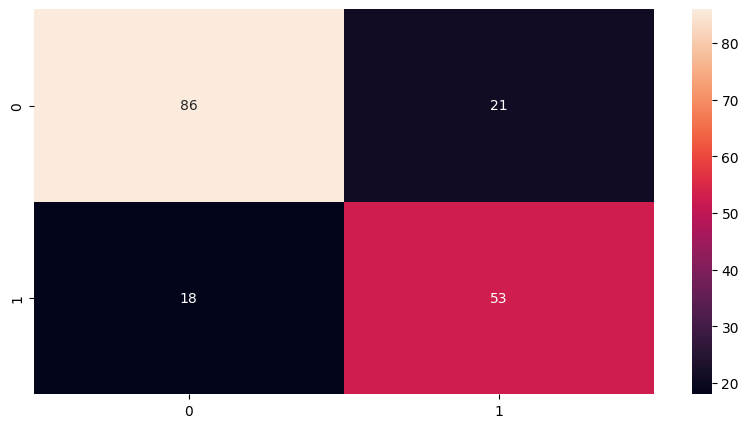

In [12]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

In [13]:
from sklearn.metrics import accuracy_score, roc_curve, precision_score, precision_recall_curve,classification_report,recall_score


In [14]:
print(classification_report(y_test,y_pred_Dtree))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.72      0.75      0.73        71

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_Dtree, digits=3))

              precision    recall  f1-score   support

           0      0.827     0.804     0.815       107
           1      0.716     0.746     0.731        71

    accuracy                          0.781       178
   macro avg      0.772     0.775     0.773       178
weighted avg      0.783     0.781     0.782       178

